<a href="https://colab.research.google.com/github/jiayeye28/BDML-Life-Insurance/blob/main/BDML_Model_(DEEP_LEARNING).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Library**

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [ ]:
# LightGBM Library
!pip install lightgbm
from lightgbm import LGBMClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, log_loss, balanced_accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# mblearn library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

In [ ]:
import xgboost as xgb
import lightgbm as lgb


#**Importing Data**

In [ ]:
# Load the cleaned CSV data file into a Pandas dataframe.
LINK = 'https://raw.githubusercontent.com/mwang164/Prudential-Life-Insurance-Assessment/main/Cleaned_Prudential_V1.csv'
df = pd.read_csv(LINK)

In [ ]:
# Set 'id' as the index column
df.set_index('Id', inplace=True)

print(df.shape)

df.head()

(59351, 137)


,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_4,...,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,-1.922281,0.641791,0.581818,0.163180,0.323008,-2.679429,-6.702620e+10,0.3600,-806554.282541,0.440000,...,0,0,0,0,0,0,1,0,0,8
5,-1.922281,0.089552,0.600000,0.163180,0.302855,-3.492644,-6.702620e+10,0.0018,-953121.904684,0.225352,...,0,0,0,0,0,0,0,0,0,4
6,-1.922281,0.089552,0.745455,0.288703,0.428780,-2.645368,-6.702620e+10,0.0300,-549693.333254,0.225352,...,0,0,0,0,0,0,0,0,1,8
7,-0.651127,0.164179,0.672727,0.205021,0.352438,-2.467657,-6.702620e+10,0.2000,-549693.333254,0.352113,...,0,0,0,0,0,0,0,1,0,8
8,-1.235182,0.417910,0.654545,0.234310,0.424046,-2.697051,-6.702620e+10,0.0500,-549693.333254,0.408451,...,0,0,0,0,0,1,0,0,0,8


## **Split data**

In [ ]:
# sample_df = df.sample(10000,random_state=12345)  # Randomly sample 10,000 of the reviews
X = df.drop(['Response'],axis=1)
y = df['Response']

## **Holdout sampling**

In [ ]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0,
                     stratify=y)
print('Shape of X and y',X.shape, y.shape,
      '\nShape of training set X and y',X_train.shape, y_train.shape,
      '\nShape of test set X and y',X_test.shape, y_test.shape)

Shape of X and y (59351, 136) (59351,) 
Shape of training set X and y (47480, 136) (47480,) 
Shape of test set X and y (11871, 136) (11871,)


## **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(X_train_norm)

print("Checking: mean of column 0 of X_train:",X_train_norm[0].mean(), " and its std deviation:", X_train_norm[0].std())

[[0.         0.69047619 0.84615385 ... 1.         0.         0.        ]
 [0.         0.64285714 0.76923077 ... 0.         0.         1.        ]
 [0.35559679 0.45238095 1.         ... 0.         1.         0.        ]
 ...
 [0.         0.5        0.46153846 ... 0.         0.         0.        ]
 [0.35559679 0.45238095 0.         ... 0.         0.         0.        ]
 [0.15269241 1.         0.30769231 ... 0.         0.         1.        ]]
Checking: mean of column 0 of X_train: 0.2441857776167937  and its std deviation: 0.3881753001473342


## **Labelencoding**

In [ ]:
# Label-encode each dataset for compatibility with the XGBoost classifier (model 12) - "use_label_encoder" has since become deprecated.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Convert each set of class labels (1,2,5,6,7,8) into encoded labels (0-7). One-hot needs to start with 0
y_train=le.fit_transform(y_train)
y_test = le.transform(y_test)

### **Onehot encode response variable**

In [ ]:
from keras.utils import to_categorical

# one-hot encode the target variable
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

## **Perceptron**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import learning_curve

# define the function to create the multilayer perceptron model
def create_model(n1, n2 ):
    mlp = Sequential()
    mlp.add(Dense(n1, input_dim=136, activation='relu'))
    mlp.add(Dense(n2, activation='relu')) # reduced number of neurons
    mlp.add(Dense(8, activation='softmax')) # set number of neurons to 8 and activation to softmax
    mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return mlp

# create a KerasClassifier object from the function
mlp = KerasClassifier(build_fn=create_model, epochs=50, batch_size=16, validation_split=0.2)


# define hyperparameters to search over
param_grid = {'n1': [16,32,64],
                'n2': [16,32,64]
              }

#this does 3-fold classification. One can change k.

# perform grid search
grid_search = GridSearchCV(estimator= mlp, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train_norm, y_train_onehot)

# print best results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Best: 0.511057 using {'n1': 16, 'n2': 32}


Epoch 1/50


<ipython-input-36-687ed42fe8a3>:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  mlp = KerasClassifier(build_fn=create_model, epochs=50, batch_size=16, validation_split=0.2)


1583/1583 [==============================] - 8s 4ms/step - loss: 1.5877 - accuracy: 0.4122 - val_loss: 1.4880 - val_accuracy: 0.4500
Epoch 2/50
1583/1583 [==============================] - 6s 4ms/step - loss: 1.4347 - accuracy: 0.4742 - val_loss: 1.4245 - val_accuracy: 0.4713
Epoch 3/50
1583/1583 [==============================] - 8s 5ms/step - loss: 1.3896 - accuracy: 0.4891 - val_loss: 1.4000 - val_accuracy: 0.4778
Epoch 4/50
1583/1583 [==============================] - 8s 5ms/step - loss: 1.3667 - accuracy: 0.4981 - val_loss: 1.3833 - val_accuracy: 0.4878
Epoch 5/50
1583/1583 [==============================] - 8s 5ms/step - loss: 1.3518 - accuracy: 0.5021 - val_loss: 1.3674 - val_accuracy: 0.4947
Epoch 6/50
1583/1583 [==============================] - 6s 4ms/step - loss: 1.3434 - accuracy: 0.5054 - val_loss: 1.3636 - val_accuracy: 0.4971
Epoch 7/50
1583/1583 [==============================] - 9s 6ms/step - loss: 1.3336 - accuracy: 0.5101 - val_loss: 1.3760 - val_accuracy: 0.4901
Epo

In [ ]:
# define the multilayer perceptron model with the best hyperparamter
mlp = Sequential()
mlp.add(Dense(16, input_dim=136, activation='relu'))
mlp.add(Dense(32, activation='relu')) # reduced number of neurons
mlp.add(Dense(8, activation='softmax')) # set number of neurons to 8 and activation to softmax
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the multilayer perceptron model
history = mlp.fit(X_train_norm, y_train_onehot , epochs=100, batch_size=16, validation_split=0.2, shuffle=True)

# evaluate the multilayer perceptron model on test data
scores = mlp.evaluate(X_test_norm, y_test_onehot, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/100
2374/2374 [==============================] - 11s 4ms/step - loss: 1.5164 - accuracy: 0.4434 - val_loss: 1.4003 - val_accuracy: 0.4829
Epoch 2/100
2374/2374 [==============================] - 9s 4ms/step - loss: 1.3778 - accuracy: 0.4926 - val_loss: 1.3681 - val_accuracy: 0.4934
Epoch 3/100
2374/2374 [==============================] - 9s 4ms/step - loss: 1.3493 - accuracy: 0.5027 - val_loss: 1.3631 - val_accuracy: 0.4940
Epoch 4/100
2374/2374 [==============================] - 9s 4ms/step - loss: 1.3339 - accuracy: 0.5103 - val_loss: 1.3421 - val_accuracy: 0.4983
Epoch 5/100
2374/2374 [==============================] - 8s 3ms/step - loss: 1.3238 - accuracy: 0.5131 - val_loss: 1.3368 - val_accuracy: 0.5059
Epoch 6/100
2374/2374 [==============================] - 9s 4ms/step - loss: 1.3169 - accuracy: 0.5165 - val_loss: 1.3315 - val_accuracy: 0.5075
Epoch 7/100
2374/2374 [==============================] - 9s 4ms/step - loss: 1.3103 - accuracy: 0.5183 - val_loss: 1.3373 - val_a

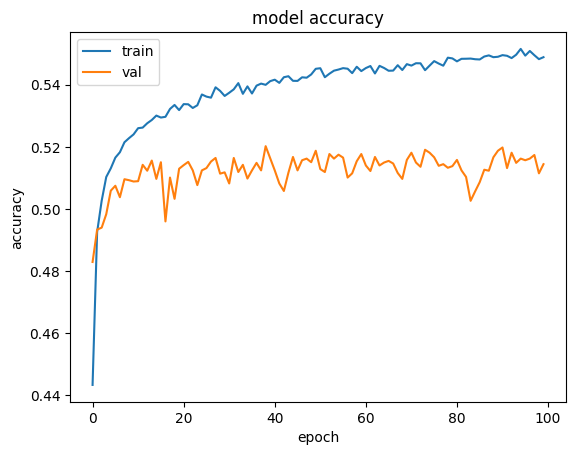

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **Prediction**

In [ ]:
# predict on test data
y_pred = mlp.predict(X_test_norm)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# convert test labels to class labels
y_true = np.argmax(y_test_onehot, axis=1)

# calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))


371/371 [==============================] - 1s 1ms/step
Accuracy: 51.10%


In [ ]:
!pip install scikit-plot
from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.metrics import classification_report, balanced_accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'MLP Confusion Matrix')

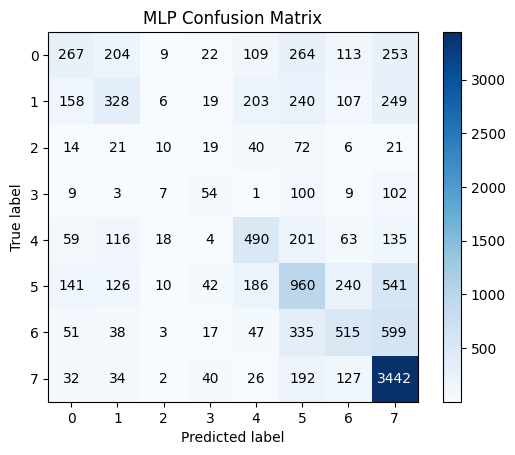

In [ ]:

# plot confusion matrix and ROC-AUC curve

plot_confusion_matrix(y_true, y_pred)
plt.title('MLP Confusion Matrix')

371/371 [==============================] - 1s 3ms/step


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

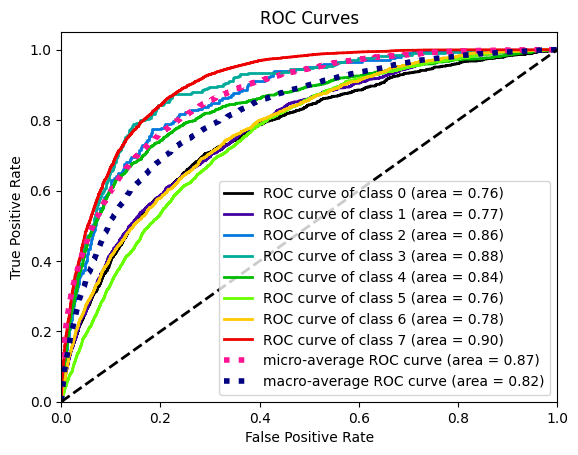

In [ ]:
# make predictions on test data
y_pred_prob = mlp.predict(X_test_norm)
plot_roc(y_true, y_pred_prob)

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=mlp,
                                                        X=X_train_norm,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.legend(loc='lower right')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.show()

ROC-AUC Score: 0.8199033291710508


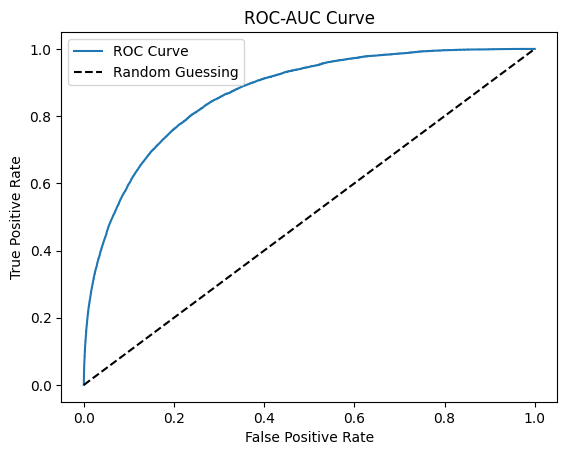

In [ ]:

# calculate ROC-AUC score
roc_score = roc_auc_score(y_test_onehot, y_pred_prob, multi_class='ovr')
print("ROC-AUC Score:", roc_score)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_onehot.ravel(), y_pred_prob.ravel())

# plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

